<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we try to use  the linear and nonlinear regression to find the relation between the variables in the table below.

Rajat Lamsal<br>
Bishnu Rijal<br>
Pratim khadka<br>
Instructor: Nicolas Jachob.

CPSMA 4413 NUMERICAL METHODS -01.

In [ ]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


%matplotlib inline

In [ ]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')

In [ ]:
data

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Sophomore,F,Yes,Nobel,Verbal,2.0,0.0,83.0,130.0,1,1.0,550,540,1090,3.44,80,3.0
358,Sophomore,M,Yes,Olympic,Math,8.0,10.0,61.0,180.0,2,1.0,600,620,1220,3.00,74,0.0
359,Sophomore,F,Yes,Nobel,Verbal,1.0,1.0,65.0,150.0,2,2.0,540,450,990,3.27,78,2.0
360,FirstYear,M,Yes,Olympic,Verbal,14.0,5.0,77.0,205.0,2,2.0,550,550,1100,2.30,72,0.0


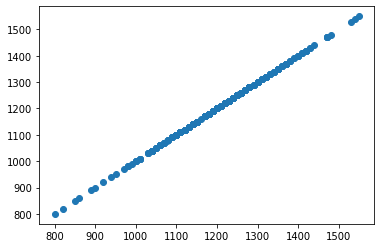

In [ ]:
plt.scatter(data["VerbalSAT"]+data["MathSAT"],data["SAT"])

In [ ]:
stats.pearsonr(data["VerbalSAT"]+data["MathSAT"],data["SAT"])

(1.0, 0.0)

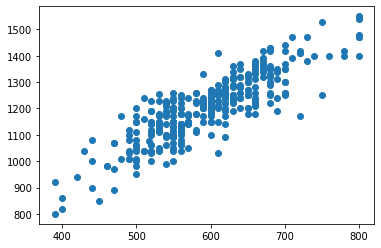

In [ ]:
plt.scatter(data["VerbalSAT"],data["SAT"])

In [ ]:
stats.pearsonr(data["VerbalSAT"],data["SAT"])

(0.86263272072066, 1.3463071839818128e-108)

Utilizing Scipy Stats package and hand method the regression would take the form, $\hat y = a_0+a_1 x$ 

$$
a_1=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and
$$
a_0 = \bar y - a_1 \bar x
$$

In [ ]:
def sum(list):
  total = 0
  for i in list:
    total = total + i
  return total

def squareAndSum(list1,list2):
  total = 0
  for i in range(len(list1)):
    total = total + list1[i]*list2[i]
  return total



In [ ]:
n = len(data['VerbalSAT'])
xbar = sum(data['VerbalSAT'])/n
ybar = sum(data['SAT'])/n
xy = squareAndSum(data['VerbalSAT'],data['SAT'])
xx = squareAndSum(data['VerbalSAT'],data['VerbalSAT'])

a1 = (xy-n*xbar*ybar)/(xx-n*xbar**2)
a0 = ybar - a1*xbar

In [ ]:
def fomulaRegression(variable,slope, intercept):
  return variable*slope+intercept

In [ ]:
print(a1)
a0

1.4104835321366764


365.5310046629761

In [ ]:
stats.linregress(data["VerbalSAT"],data["SAT"])

LinregressResult(slope=1.4104835321366782, intercept=365.5310046629751, rvalue=0.8626327207206598, pvalue=1.346307183982045e-108, stderr=0.04359092696421324)

In [ ]:
m = stats.linregress(data["VerbalSAT"],data["SAT"])[0]
b = stats.linregress(data["VerbalSAT"],data["SAT"])[1]
def y(x):
    return(m*x+b)

In [ ]:
y(3)

369.7624552593851

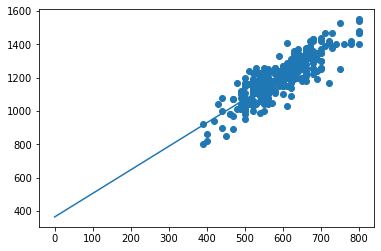

In [ ]:
x = np.arange( 0,500,1)
plt.scatter(data["VerbalSAT"],data["SAT"])
plt.plot(x,y(x))

In [ ]:
#sum of the residuals
s = 0
for i in range (0,len(data["VerbalSAT"])):
    s = s+y(data["VerbalSAT"][i])-data["SAT"][i]

In [ ]:
s

5.3660187404602766e-11

In [ ]:
ss = 0
for i in range (0,len(data["VerbalSAT"])):
    ss = ss+(y(data["VerbalSAT"][i])-data["SAT"][i])**2

In [ ]:
ss

1358730.7270751342

Arranging these datasets in system of linear equation/matrix form and solving with any methods for instance Gaussian Elimination method.
$$
\left[
\begin{array}{ccc|c}
n& \sum x_i&\sum x_i^2&\sum y_i\\
\sum x_i&\sum x_i^2&\sum x_i^3&\sum x_i y_i\\
\sum x_i^2 &\sum x_i^3&\sum x_i^4&\sum x_i^2 y_i
\end{array}
\right]
$$
 The equation will take the following form.
$$
\hat y = a_0+a_1 x+a_2 x^2
$$



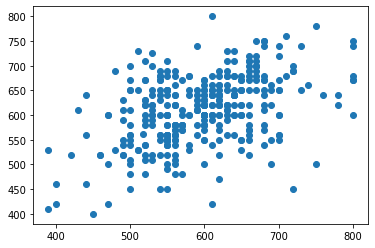

In [ ]:
plt.scatter(data["VerbalSAT"],data["MathSAT"])

In [ ]:
x = sum(data['VerbalSAT'])
xx = squareAndSum(data['VerbalSAT'],data['VerbalSAT'])
xxx = squareAndSum(data['VerbalSAT']**2,data['VerbalSAT'])
xxxx = squareAndSum(data['VerbalSAT']**3,data['VerbalSAT'])

matrix = [[n,x,xx,sum(data['MathSAT'])]
          ,[x,xx,xxx,squareAndSum(data['VerbalSAT'],data['MathSAT'])]
          ,[xx,xxx,xxxx,squareAndSum(data['VerbalSAT']**2,data['MathSAT'])]
          ]

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

In [ ]:
gaussJordan(np.array(matrix))

array([[ 1.00000000e+00,  6.95517291e-12, -5.82076609e-11,
         7.57603218e+01],
       [ 0.00000000e+00,  1.00000000e+00,  2.27373675e-13,
         1.39041927e+00],
       [ 0.00000000e+00,  1.92605984e-17,  1.00000000e+00,
        -8.15781351e-04]])

In [ ]:
def rowCreator(input,order):
  row = []
  for i in range(order+1):
    row.append(input**i)
  return row

def matrixCreator(list, order):
  matrix = []
  for i in list:
    matrix.append(rowCreator(i,order))
  return matrix

In [ ]:
A = np.array(matrixCreator(data['VerbalSAT'],2))
y = np.array(data['MathSAT'])

In [ ]:
np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

array([ 7.57603218e+01,  1.39041927e+00, -8.15781351e-04])

In [ ]:
results = np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

def quadRegression(x):
  return results[0]+x*results[1]+results[2]*x**2

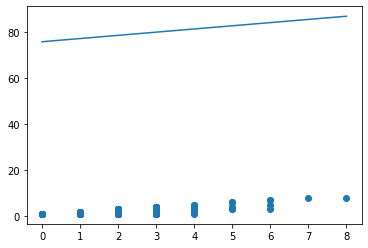

In [ ]:
x = np.arange( 0,10,2)
plt.scatter(data["Siblings"],data["BirthOrder"])
plt.plot(x,quadRegression(x))